In [20]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import joblib
from holidays_co import is_holiday_date

In [50]:
# Cargar los datos
data = pd.read_csv('Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.csv', low_memory=False)

In [51]:
data = data.dropna()
data = data.drop('CODIGO DANE', axis=1)
data['FECHA HECHO'] = pd.to_datetime(data['FECHA HECHO'], format='%d/%m/%Y')
# Agregamos una columna para dia y otra para mes
#data['DIA'] = data['FECHA HECHO'].dt.day
#data['MES'] = data['FECHA HECHO'].dt.month
# Agregamos una columna para saber si el dia es festivo si fue festivo se le asigna 1, si no fue festivo se le asigna 0
#data['FESTIVO'] = data['FECHA HECHO'].apply(lambda x: 1 if is_holiday_date(x) else 0)
data = pd.DataFrame(data)

In [52]:
# Agrupar los datos por fecha y sumar la cantidad
data = data.groupby(by='FECHA HECHO')['FECHA HECHO'].count().reset_index(name='Cantidad')
data = data.rename(columns={'FECHA HECHO': 'ds', 'Cantidad': 'y'})

In [53]:
data

,ds,y
0,2010-01-01,506
1,2010-01-02,202
2,2010-01-03,212
3,2010-01-04,177
4,2010-01-05,141
...,...,...
4621,2022-08-27,140
4622,2022-08-28,163
4623,2022-08-29,117
4624,2022-08-30,118


In [54]:
m = Prophet(daily_seasonality=True)
model = m.fit(data)

/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -38.7891
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       13149.8    0.00462823       385.842           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13165.4   0.000391723       236.549           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         13174    0.00174942        328.96      0.3014           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     379       13176.8   1.04126e-05       108.057   4.564e-08       0.001      509  LS failed, Hessian reset 
     399       13177.2    0.00183704       773.046      0.2388           1      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       13178.2   0.000118545    

In [62]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4986,2023-08-27
4987,2023-08-28
4988,2023-08-29
4989,2023-08-30
4990,2023-08-31


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
4986,2023-08-27,9.611960,-0.152071,19.815406
4987,2023-08-28,6.814436,-2.245909,15.870932
4988,2023-08-29,6.742644,-2.136951,16.690574
4989,2023-08-30,6.712690,-2.068223,17.090259
4990,2023-08-31,6.744745,-2.757211,16.130192


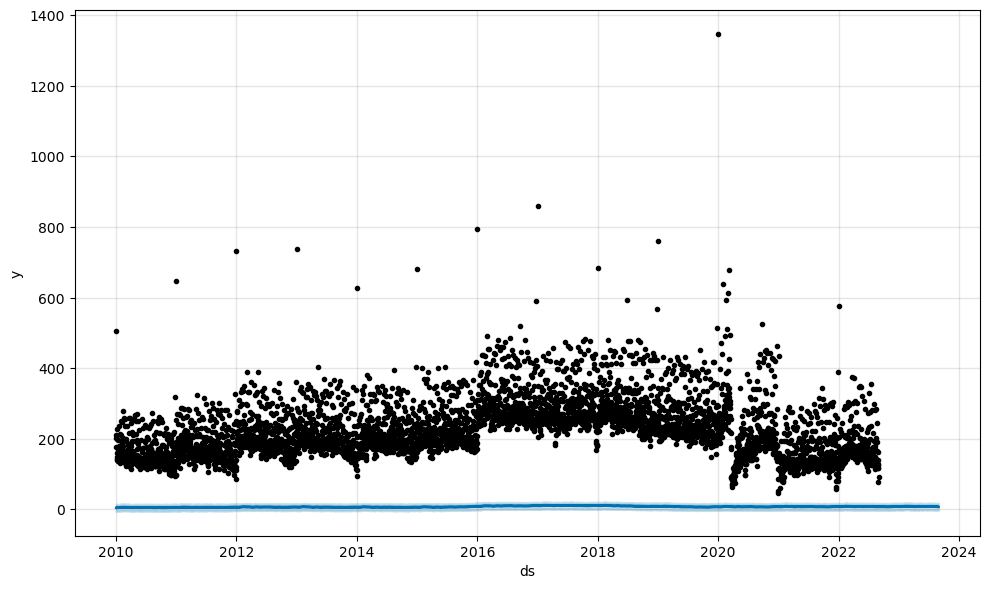

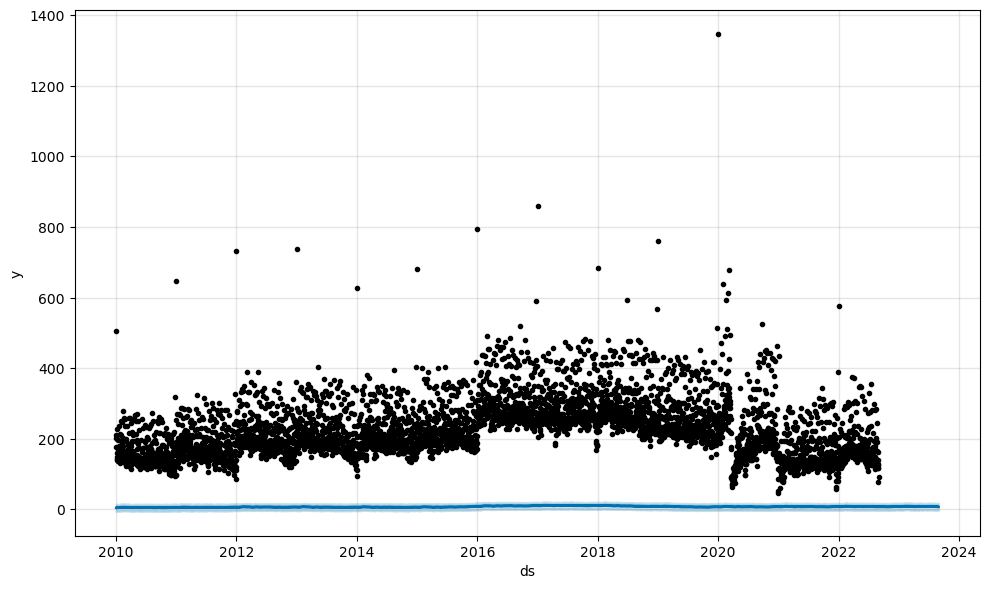

In [56]:
model.plot(forecast)

/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


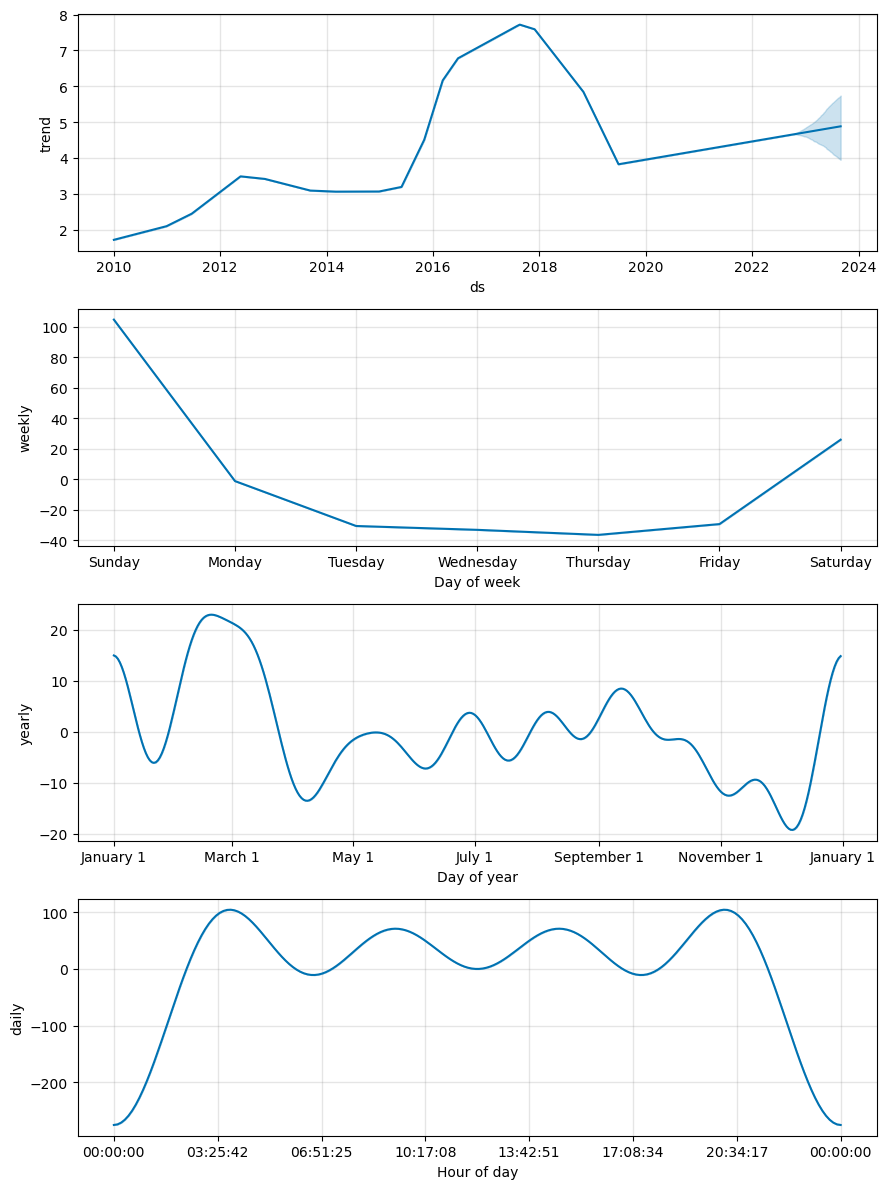

In [57]:
fig2 = m.plot_components(forecast)


In [58]:
np.asarray(data)
data.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [59]:
# save model to file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [70]:
# Probar el modelo
model = joblib.load('model.pkl')
var = np.array([2010, 1, 1, 1, 1])
print(model.predict(var))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices